# پروژه سوم درس داده کاوی
# فصل 6 و 7
مهناز توحیدی مهر
شماره دانشجویی : 4003664005

#   (Heating_Load)بخش اول : پیش بینی
ابتدا کتابخانه های مورد نیاز را اضافه می کنیم

In [19]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import scale

فایل داده های آموزشی مورد نظر را در دایرکتوری زیر آپلود کرده و می خوانیم

In [2]:
TrainData =pd.read_csv('/content/sample_data/01.train.csv')
TrainData

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.76,661.5,416.5,122.50,7.0,2,0.40,1,40.78,39.55
1,0.98,514.5,294.0,110.25,7.0,4,0.25,1,28.37,29.28
2,0.74,686.0,245.0,220.50,3.5,2,0.10,1,10.36,13.43
3,0.90,563.5,318.5,122.50,7.0,2,0.10,5,29.83,29.82
4,0.86,588.0,294.0,147.00,7.0,4,0.25,3,29.43,28.38
...,...,...,...,...,...,...,...,...,...,...
663,0.76,661.5,416.5,122.50,7.0,5,0.10,1,32.21,33.67
664,0.86,588.0,294.0,147.00,7.0,4,0.10,2,26.33,27.36
665,0.71,710.5,269.5,220.50,3.5,4,0.10,5,10.67,14.26
666,0.98,514.5,294.0,110.25,7.0,5,0.25,4,28.62,30.12


همانطور که در قسمت زیر مشخص است داده خالی در هیچ یک از ستون ها نداریم

In [3]:
TrainData.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

اسامی ستون ها و نوع داده ای آن ها با دستور زیر مشخص می شود

In [4]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       668 non-null    float64
 1   Surface_Area               668 non-null    float64
 2   Wall_Area                  668 non-null    float64
 3   Roof_Area                  668 non-null    float64
 4   Overall_Height             668 non-null    float64
 5   Orientation                668 non-null    int64  
 6   Glazing_Area               668 non-null    float64
 7   Glazing_Area_Distribution  668 non-null    int64  
 8   Heating_Load               668 non-null    float64
 9   Cooling_Load               668 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 52.3 KB


سایز دیتاست را مشخص میکنیم
ده ویژگی داریم که دوتای آن برچسب هستند و هشت تای دیگر ویژگیهای مورد استفاده برای آموزش مدل ها
تعداد رکوردها هم مشخص می شود

In [5]:
TrainData.shape

(668, 10)

مشخصات ریزتری از ویژگی ها با دستور زیر به دست می آوریم

مقدار میانگین هر ستون

مینیمم هر ستون

ماکزیمم هر ستون


In [6]:
TrainData.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.763338,672.502994,318.573353,176.964820,5.234281,3.526946,0.236377,2.797904,22.224461,24.494731
std,0.105762,88.245645,43.781674,45.180399,1.751241,1.110476,0.134583,1.551571,10.051225,9.483474
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.682500,588.000000,294.000000,140.875000,3.500000,3.000000,0.100000,1.000000,13.000000,15.640000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,4.000000,0.250000,3.000000,18.595000,21.700000
75%,0.860000,741.125000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,31.555000,32.952500
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


داده های برچسب را با قاعده ی مورد نظر در صورت سوال به صفر و یک تبدیل   میکنیم و به عنوان یک ستون جدید به دیتاست اضافه می کنیم

صفر = بار بالا

یک = بار پایین

In [6]:
TrainData['Heating_Load_cat'] = pd.cut(TrainData.Heating_Load,bins=[6,18,44],labels = [0,1])
TrainData

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Heating_Load_cat
0,0.76,661.5,416.5,122.50,7.0,2,0.40,1,40.78,39.55,1
1,0.98,514.5,294.0,110.25,7.0,4,0.25,1,28.37,29.28,1
2,0.74,686.0,245.0,220.50,3.5,2,0.10,1,10.36,13.43,0
3,0.90,563.5,318.5,122.50,7.0,2,0.10,5,29.83,29.82,1
4,0.86,588.0,294.0,147.00,7.0,4,0.25,3,29.43,28.38,1
...,...,...,...,...,...,...,...,...,...,...,...
663,0.76,661.5,416.5,122.50,7.0,5,0.10,1,32.21,33.67,1
664,0.86,588.0,294.0,147.00,7.0,4,0.10,2,26.33,27.36,1
665,0.71,710.5,269.5,220.50,3.5,4,0.10,5,10.67,14.26,0
666,0.98,514.5,294.0,110.25,7.0,5,0.25,4,28.62,30.12,1


دیتا فریم جدیدی می سازیم که در آن داده ها نرمال سازی شده اند

In [23]:
scaled_TrainData = scale(TrainData)
df_scaled_TrainData = pd.DataFrame(scaled_TrainData,index=TrainData.index,columns=TrainData.columns)
df_scaled_TrainData

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Heating_Load_cat
0,-0.031588,-0.124779,2.238380,-1.206400,1.009023,-1.376068,1.216690,-1.159632,1.847481,1.588716,0.985140
1,2.050105,-1.791832,-0.561691,-1.477738,1.009023,0.426311,0.101298,-1.159632,0.611880,0.504968,0.985140
2,-0.220833,0.153063,-1.681719,0.964308,-0.991058,-1.376068,-1.014094,-1.159632,-1.181284,-1.167612,-1.015084
3,1.293125,-1.236148,-0.001677,-1.206400,1.009023,-1.376068,-1.014094,1.420332,0.757245,0.561952,0.985140
4,0.914636,-0.958306,-0.561691,-0.663723,1.009023,0.426311,0.101298,0.130350,0.717419,0.409995,0.985140
...,...,...,...,...,...,...,...,...,...,...,...
663,-0.031588,-0.124779,2.238380,-1.206400,1.009023,1.327501,-1.014094,-1.159632,0.994209,0.968226,0.985140
664,0.914636,-0.958306,-0.561691,-0.663723,1.009023,0.426311,-1.014094,-0.514641,0.408768,0.302359,0.985140
665,-0.504700,0.430905,-1.121705,0.964308,-0.991058,0.426311,-1.014094,1.420332,-1.150419,-1.080026,-1.015084
666,2.050105,-1.791832,-0.561691,-1.477738,1.009023,1.327501,0.101298,0.775341,0.636771,0.593610,0.985140


با دستورات زیر میزان ارتباط بین ویژگی های نرمال شده مشخص می شود
همانطور که پیداست دو ویژگی جهت و لعاب منطقه توزیع مقدار ارتباط خیلی کمی  (نزدیک به صفر)با بار گرمایشی دارند پس میتوانیم در مرحله آموزش مدل از آن ها صرف نظر کنیم 

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
Relative_Compactness,1.000000,-0.991984,-0.206539,-0.868692,0.829680,-0.012064,-0.016655,-0.006846,0.621693
Surface_Area,-0.991984,1.000000,0.199177,0.880087,-0.859060,0.011963,0.013104,0.006339,-0.657547
Wall_Area,-0.206539,0.199177,1.000000,-0.290006,0.276680,0.019602,-0.011986,-0.016003,0.448167
Roof_Area,-0.868692,0.880087,-0.290006,1.000000,-0.973008,0.002185,0.018605,0.013944,-0.859301
Overall_Height,0.829680,-0.859060,0.276680,-0.973008,1.000000,-0.009226,-0.014268,-0.013724,0.887306
Orientation,-0.012064,0.011963,0.019602,0.002185,-0.009226,1.000000,0.015000,0.007081,-0.002952
Glazing_Area,-0.016655,0.013104,-0.011986,0.018605,-0.014268,0.015000,1.000000,0.210806,0.267936
Glazing_Area_Distribution,-0.006846,0.006339,-0.016003,0.013944,-0.013724,0.007081,0.210806,1.000000,0.080494
Heating_Load,0.621693,-0.657547,0.448167,-0.859301,0.887306,-0.002952,0.267936,0.080494,1.000000


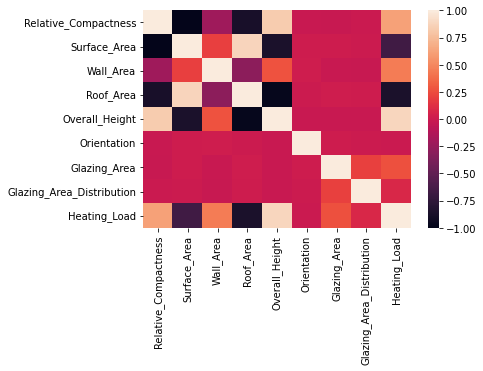

In [42]:
cor_val_heat = df_scaled_TrainData.drop(['Heating_Load_cat','Cooling_Load'],axis=1)
cor_heat = cor_val_heat.corr()
sb.heatmap(cor_heat,xticklabels=cor_heat.columns,yticklabels=cor_heat,vmin=-1,vmax=1)
cor_heat



ویژگی ها مربوط به آموزش مدل و برچسب را مشخص می کنیم

In [29]:
features = ['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Overall_Height','Glazing_Area']
X_train = TrainData[features]
Y_train = TrainData['Heating_Load_cat']

print(X_train)
print(Y_train)

     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                    0.76         661.5      416.5     122.50             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.74         686.0      245.0     220.50             3.5   
3                    0.90         563.5      318.5     122.50             7.0   
4                    0.86         588.0      294.0     147.00             7.0   
..                    ...           ...        ...        ...             ...   
663                  0.76         661.5      416.5     122.50             7.0   
664                  0.86         588.0      294.0     147.00             7.0   
665                  0.71         710.5      269.5     220.50             3.5   
666                  0.98         514.5      294.0     110.25             7.0   
667                  0.90         563.5      318.5     122.50             7.0   

     Glazing_Area  
0      

 DecisionTreeClassifier()در این قسمت با استفاده از تابع 
 یک مدل از نوع درخت تصمیم می سازیم
 آن را با داده های آموزشی ( ویژگیها،برچسب) آموزش می دهیم
 با استفاده از پلات آن درخت تصمیمی را نمایش میدهیم

Decision Tree Model Trained


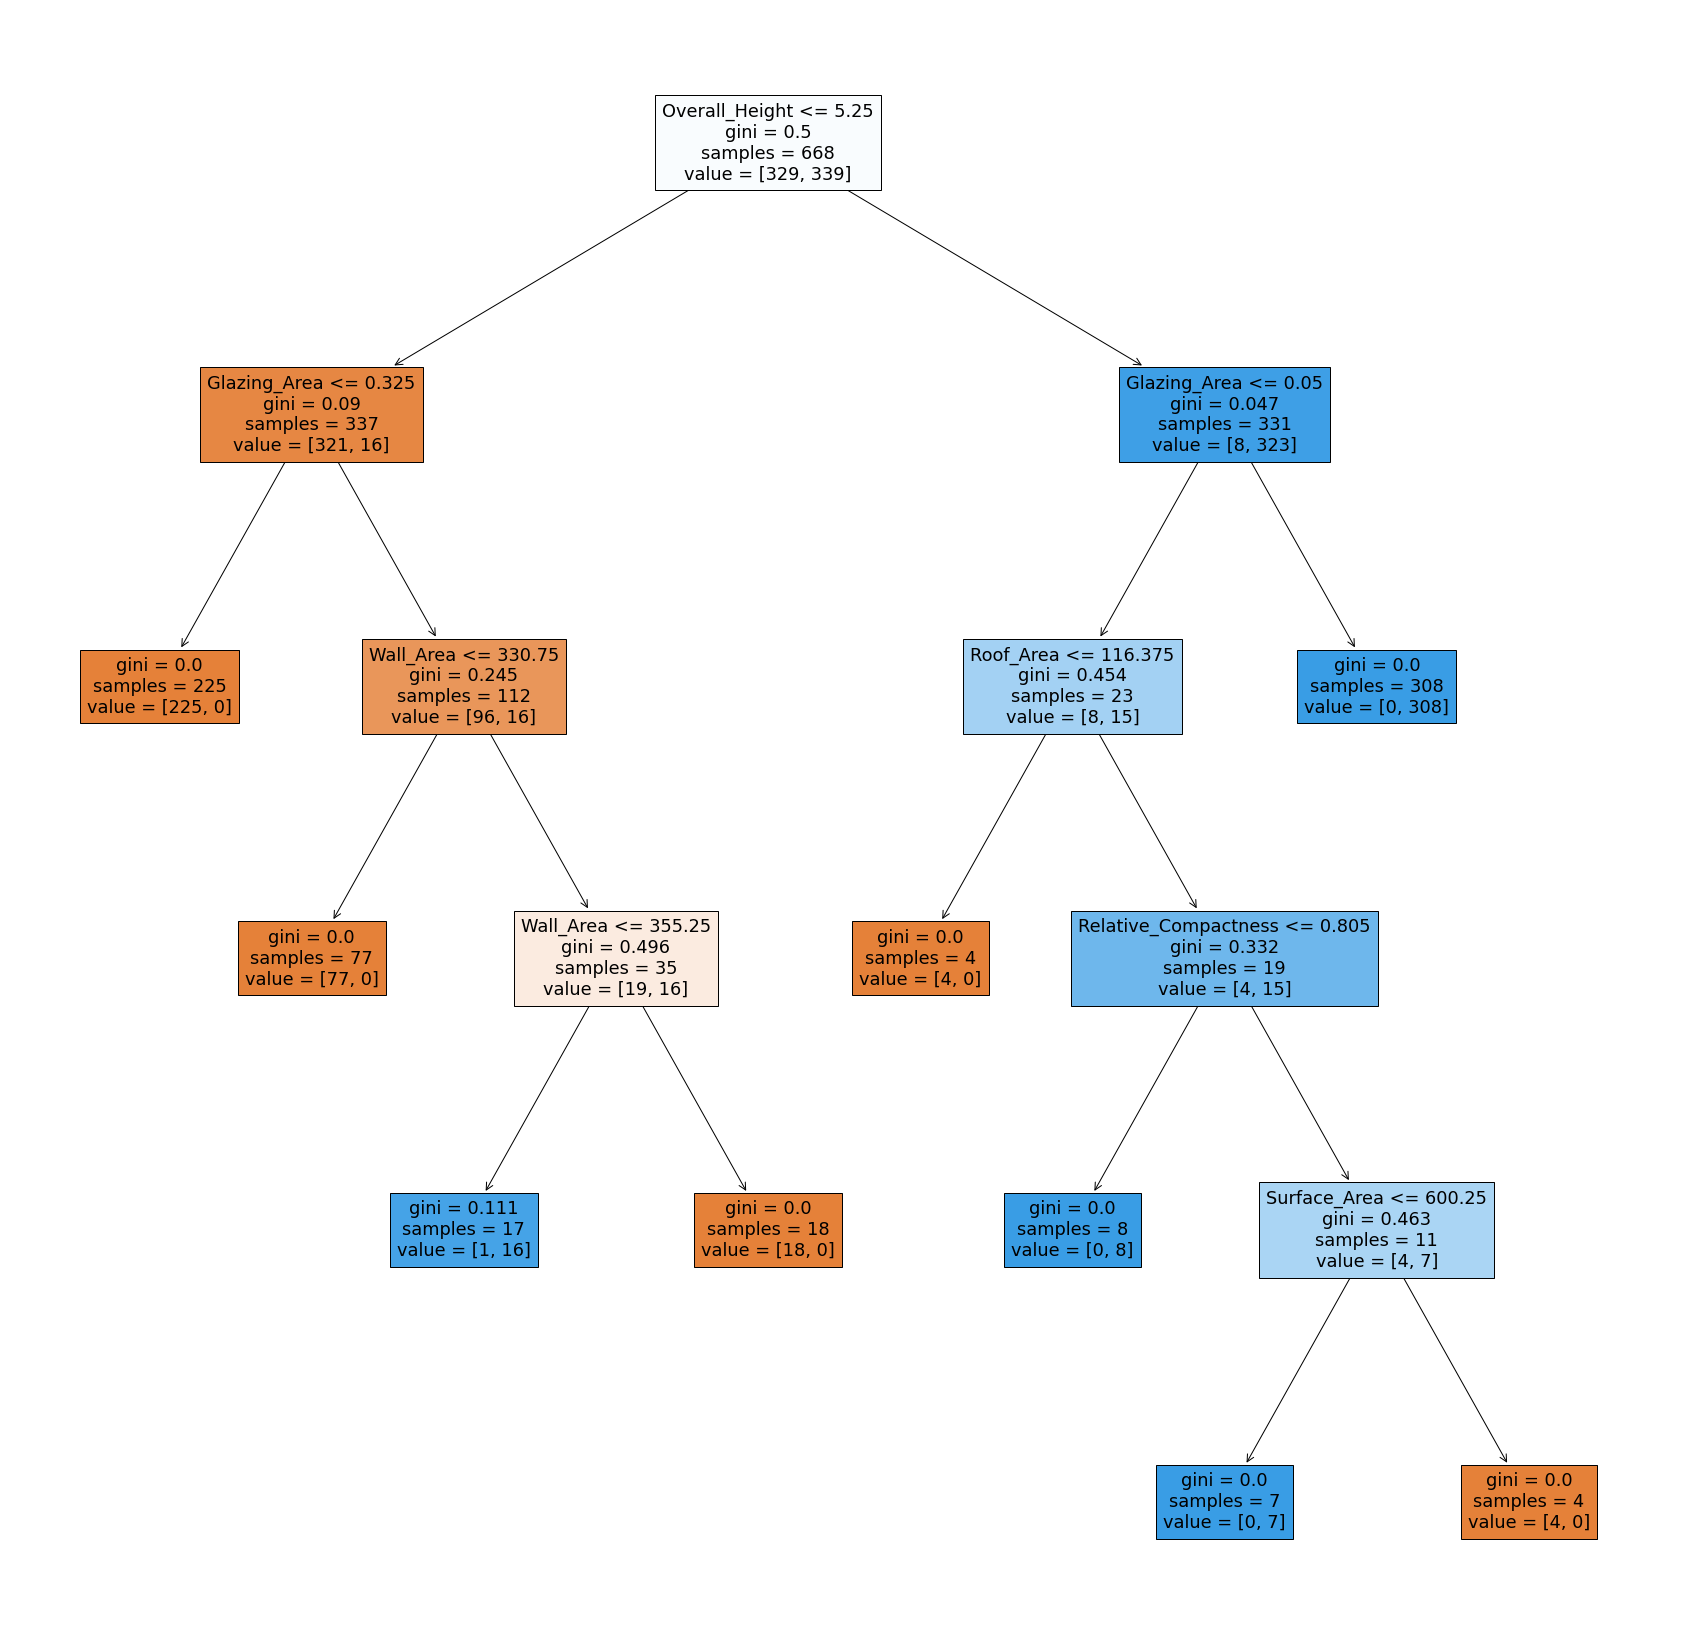

In [30]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,Y_train)
print('Decision Tree Model Trained')
plt.figure(figsize=(30,30))
tree.plot_tree(dtree , feature_names = X_train.columns , filled = True)
plt.show()


داده های مربوط به تست را در دایرکتوری مورد نظر آپلود کرده و میخوانیم.
برچسب داده های تست را با قاعده مورد نظر به 0 و 1 تبدیل میکنیم

In [31]:
TestData = pd.read_csv('/content/sample_data/02.test.csv')
TestData['Heating_Load_cat'] = pd.cut(TestData.Heating_Load,bins=[6,18,44],labels = [0,1])
TestData

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Heating_Load_cat
0,0.62,808.5,367.5,220.50,3.5,2,0.40,3,16.47,16.90,0
1,0.66,759.5,318.5,220.50,3.5,2,0.25,1,13.17,16.39,0
2,0.98,514.5,294.0,110.25,7.0,2,0.40,3,32.82,32.78,1
3,0.79,637.0,343.0,147.00,7.0,4,0.40,4,41.32,46.23,1
4,0.64,784.0,343.0,220.50,3.5,3,0.25,4,16.69,19.76,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.66,759.5,318.5,220.50,3.5,4,0.25,4,12.86,16.17,0
96,0.86,588.0,294.0,147.00,7.0,4,0.10,5,25.36,32.04,1
97,0.86,588.0,294.0,147.00,7.0,4,0.25,5,28.31,34.15,1
98,0.71,710.5,269.5,220.50,3.5,2,0.10,4,10.66,13.67,0


با داده های تست با مدل آموزش داده شده برچسب بار گرمایش را پیش بینی می کنیم

ماتریس آشفتگی و معیار های مورد نیاز را به دست می آوریم

In [40]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
X_test = TestData[features]
Y_test = TestData['Heating_Load_cat']
y_pred_dt = dtree.predict(X_test)
print('Decision Tree Model Predicted.')

dt_con_matrix = confusion_matrix(Y_test, y_pred_dt)
print('Confusion Matrix:\n',dt_con_matrix)
print("Accuracy : ", metrics.accuracy_score(Y_test, y_pred_dt))
print("Precision:",metrics.precision_score(Y_test, y_pred_dt))
print("Error Rate:",1-metrics.accuracy_score(Y_test, y_pred_dt))
print("Sensivity:",dt_con_matrix[0][0]/(dt_con_matrix[0][0]+dt_con_matrix[0][1]))
print("Specifity:",dt_con_matrix[1][1]/(dt_con_matrix[1][1]+dt_con_matrix[1][0]))
print("Recall:",dt_con_matrix[0][0]/(dt_con_matrix[0][0]+dt_con_matrix[0][1]))
print("F-Score:",metrics.f1_score(Y_test, y_pred_dt))

Decision Tree Model Predicted.
Confusion Matrix:
 [[44  1]
 [ 0 55]]
Accuracy :  0.99
Precision: 0.9821428571428571
Error Rate: 0.010000000000000009
Sensivity: 0.9777777777777777
Specifity: 1.0
Recall: 0.9777777777777777
F-Score: 0.9909909909909909


یک مدل از نوع رندم فارست می سازیم
آن را آموزش می دهیم
با داده های تست برچسب را پیش بینی می کنیم
و ماتریس آشفتگی و معیارهای سنجش را به دست می آوریم

In [41]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, Y_train)
print('Random forest Model Trained')

y_pred_rf = clf.predict(X_test)
rf_con_matrix = confusion_matrix(Y_test, y_pred_rf)
print('Confusion Matrix:\n',rf_con_matrix)
print("Accuracy : ", metrics.accuracy_score(Y_test, y_pred_rf))
print("Precision:",metrics.precision_score(Y_test, y_pred_rf))
print("Error Rate:",1-metrics.accuracy_score(Y_test, y_pred_rf))
print("Sensivity:",rf_con_matrix[0][0]/(rf_con_matrix[0][0]+rf_con_matrix[0][1]))
print("Specifity:",rf_con_matrix[1][1]/(rf_con_matrix[1][1]+rf_con_matrix[1][0]))
print("Recall:",rf_con_matrix[0][0]/(rf_con_matrix[0][0]+rf_con_matrix[0][1]))
print("F-Score:",metrics.f1_score(Y_test, y_pred_rf))

Random forest Model Trained
Confusion Matrix:
 [[44  1]
 [ 0 55]]
Accuracy :  0.99
Precision: 0.9821428571428571
Error Rate: 0.010000000000000009
Sensivity: 0.9777777777777777
Specifity: 1.0
Recall: 0.9777777777777777
F-Score: 0.9909909909909909


# دو مدل در نهایت نتایج یکسانی داشتند

#   (Cooling_Load)بخش دوم : پیش بینی


  در این قسمت می خواهیم با ساخت مدل شبکه عصبی و ماشین بردار پشتیبان آن ها را با داده ها آموزش داده و برچسب داده های تست را پیش بینی کنیم 

پس داده های آموزشی را بارگذاری کرده و یک ویژگی جدید برای نشان دادن بار سرمایشی که 5 حالت دارد به دیتاست اضافه می کنیم. 
با داشتن مینیمم و ماکزیمم بار سرمایشی، بازه آن را به 5 سطح مساوی تقسیم کرده و هر مقدار را در یکی از این بازه ها قرار می دهیم

In [138]:
TrainData =pd.read_csv('/content/sample_data/01.train.csv')
b =  (TrainData.Cooling_Load.max()-TrainData.Cooling_Load.min())/5
min = TrainData.Cooling_Load.min()

TrainData['Cooling_Load_cat'] = pd.cut(TrainData.Cooling_Load,bins=[min-1,min+b,min+(2*b),min+(3*b),min+(4*b),min+(5*b)+1],labels = [0,1,2,3,4])
TrainData

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Cooling_Load_cat
0,0.76,661.5,416.5,122.50,7.0,2,0.40,1,40.78,39.55,3
1,0.98,514.5,294.0,110.25,7.0,4,0.25,1,28.37,29.28,2
2,0.74,686.0,245.0,220.50,3.5,2,0.10,1,10.36,13.43,0
3,0.90,563.5,318.5,122.50,7.0,2,0.10,5,29.83,29.82,2
4,0.86,588.0,294.0,147.00,7.0,4,0.25,3,29.43,28.38,2
...,...,...,...,...,...,...,...,...,...,...,...
663,0.76,661.5,416.5,122.50,7.0,5,0.10,1,32.21,33.67,3
664,0.86,588.0,294.0,147.00,7.0,4,0.10,2,26.33,27.36,2
665,0.71,710.5,269.5,220.50,3.5,4,0.10,5,10.67,14.26,0
666,0.98,514.5,294.0,110.25,7.0,5,0.25,4,28.62,30.12,2


میزان ارتباط بین بار سرمایشی و ویژگی ها را بدست می آوریم 
از آنجا که باز هم جهت و لعاب منطقه توزیع ارتباط کمی با برچسب بار سرمایشی دارند در آموزش مدل از آنها استفاده نمی کنیم

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Cooling_Load
Relative_Compactness,1.000000,-0.991984,-0.206539,-0.868692,0.829680,-0.012064,-0.016655,-0.006846,0.635789
Surface_Area,-0.991984,1.000000,0.199177,0.880087,-0.859060,0.011963,0.013104,0.006339,-0.674191
Wall_Area,-0.206539,0.199177,1.000000,-0.290006,0.276680,0.019602,-0.011986,-0.016003,0.420432
Roof_Area,-0.868692,0.880087,-0.290006,1.000000,-0.973008,0.002185,0.018605,0.013944,-0.862118
Overall_Height,0.829680,-0.859060,0.276680,-0.973008,1.000000,-0.009226,-0.014268,-0.013724,0.894392
Orientation,-0.012064,0.011963,0.019602,0.002185,-0.009226,1.000000,0.015000,0.007081,0.011398
Glazing_Area,-0.016655,0.013104,-0.011986,0.018605,-0.014268,0.015000,1.000000,0.210806,0.201420
Glazing_Area_Distribution,-0.006846,0.006339,-0.016003,0.013944,-0.013724,0.007081,0.210806,1.000000,0.039275
Cooling_Load,0.635789,-0.674191,0.420432,-0.862118,0.894392,0.011398,0.201420,0.039275,1.000000


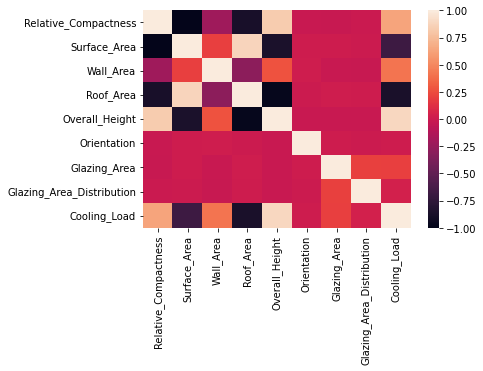

In [81]:
cor_val_cool = df_scaled_TrainData.drop(['Heating_Load_cat','Heating_Load'],axis=1)
cor_cool = cor_val_cool.corr()
sb.heatmap(cor_cool,xticklabels=cor_cool.columns,yticklabels=cor_cool,vmin=-1,vmax=1)
cor_cool


داده ها مربوط به آموزش شبکه عصبی و برچسب آنها را مشخص میکنیم

In [139]:
features = ['Relative_Compactness',	'Surface_Area',	'Wall_Area',	'Roof_Area','Overall_Height','Glazing_Area']
nn_X_train = df_scaled_TrainData[features]
nn_Y_train = TrainData['Cooling_Load_cat']

print(nn_X_train)
print(nn_Y_train)

     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0               -0.031588     -0.124779   2.238380  -1.206400        1.009023   
1                2.050105     -1.791832  -0.561691  -1.477738        1.009023   
2               -0.220833      0.153063  -1.681719   0.964308       -0.991058   
3                1.293125     -1.236148  -0.001677  -1.206400        1.009023   
4                0.914636     -0.958306  -0.561691  -0.663723        1.009023   
..                    ...           ...        ...        ...             ...   
663             -0.031588     -0.124779   2.238380  -1.206400        1.009023   
664              0.914636     -0.958306  -0.561691  -0.663723        1.009023   
665             -0.504700      0.430905  -1.121705   0.964308       -0.991058   
666              2.050105     -1.791832  -0.561691  -1.477738        1.009023   
667              1.293125     -1.236148  -0.001677  -1.206400        1.009023   

     Glazing_Area  
0      

داده های تست را بارگذاری کرده و ستون برچسب بار سرمایشی را به 5 بازه تبدیل می کنیم
همچنین آن ها را برای ورود به شبکه عصبی نرمالسازی میکنیم

In [84]:
TestData = pd.read_csv('/content/sample_data/02.test.csv')
scaled_TestData = scale(TestData)
df_scaled_TestData = pd.DataFrame(scaled_TestData,index=TestData.index,columns=TestData.columns)
TestData['Cooling_Load_cat'] = pd.cut(TestData.Cooling_Load,bins=[min,min+b,min+(2*b),min+(3*b),min+(4*b),min+(5*b)],labels = [0,1,2,3,4])
TestData

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Cooling_Load_cat
0,0.62,808.5,367.5,220.50,3.5,2,0.40,3,16.47,16.90,0
1,0.66,759.5,318.5,220.50,3.5,2,0.25,1,13.17,16.39,0
2,0.98,514.5,294.0,110.25,7.0,2,0.40,3,32.82,32.78,2
3,0.79,637.0,343.0,147.00,7.0,4,0.40,4,41.32,46.23,4
4,0.64,784.0,343.0,220.50,3.5,3,0.25,4,16.69,19.76,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0.66,759.5,318.5,220.50,3.5,4,0.25,4,12.86,16.17,0
96,0.86,588.0,294.0,147.00,7.0,4,0.10,5,25.36,32.04,2
97,0.86,588.0,294.0,147.00,7.0,4,0.25,5,28.31,34.15,3
98,0.71,710.5,269.5,220.50,3.5,2,0.10,4,10.66,13.67,0


داده ها و برچسب مربوط به تست مدل را مشخص میکنیم
  این داده ها باید از داده های نرمال شده باشد 

In [85]:
X_test = df_scaled_TestData[features]
Y_test_cool = TestData['Cooling_Load_cat']

یک مدل شبکه عصبی می سازیم

آن را آموزش می دهیم

با مدل و داده های تست برچسب آن ها را پیش بینی می کنیم

معیارهای ارزیابی مدل را به دست می آوریم

با عوض کردن تنظیمات مدل می توان به نتایج متفاوتی رسید

In [141]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

clf = MLPClassifier(hidden_layer_sizes=(3),random_state=3, max_iter=300)
clf.fit(nn_X_train,nn_Y_train)

y_pred = clf.predict(X_test)

print("Neural Network Model:")
print("Accuracy : ", metrics.accuracy_score(Y_test_cool, y_pred))
print("Precision: ", metrics.precision_score(Y_test_cool, y_pred,average='macro'))
print("Recall:",metrics.recall_score(Y_test_cool, y_pred,average = 'macro'))
print("F-Score:",metrics.f1_score(Y_test_cool, y_pred,average='macro'))
print('\n')

Neural Network Model:
Accuracy :  0.73
Precision:  0.4295265805904104
Recall: 0.5309473684210527
F-Score: 0.47303617099013523




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


یک مدل ماشین بردار پشتیبان ساخته و آن را آموزش می دهیم
معیارهای ارزیابی را محاسبه میکنیم.

In [142]:
from sklearn import svm
svm_X_train = df_scaled_TrainData[features]
svm_Y_train = TrainData['Cooling_Load_cat']
svm_clf = svm.SVC(kernel='rbf', random_state=1, gamma=.10, C=1.0)
svm_clf.fit(svm_X_train, svm_Y_train)

svm_pred = svm_clf.predict(X_test)

print("SVM Model:")
print("Accuracy : ", metrics.accuracy_score(Y_test_cool, svm_pred))
print("Precision: ", metrics.precision_score(Y_test_cool, svm_pred,average='macro'))
print("Recall:",metrics.recall_score(Y_test_cool, svm_pred,average = 'macro'))
print("F-Score:",metrics.f1_score(Y_test_cool, svm_pred,average='macro'))
print('\n')

SVM Model:
Accuracy :  0.68
Precision:  0.3996755475135708
Recall: 0.48589473684210527
F-Score: 0.43236068895643365




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# همانطور که دیدیم مدل شبکه عصبی در این پیش بینی بهتر عمل کرده است